# Hyperexponential integration

In [1]:
from sympy import *
x, y = symbols("x y")
init_printing()

def multiple_of_integration_denominator(a, b):
    """
    Input: Polynomials a,b where gcd(a, b) != 1 and b != 0 monic

    Output: A monic polynomial V for which v divides V as desribed in Section 3.2
    """
    R = resultant(b, a - y * diff(b, x), x)
    d = max(
        [0, *[r for r in solve(R) if r.is_integer and r > 0]]
    )
    if d == 0:
        return 1
    else:
        V = 1
        for i in range(1, d+1):
            H_i = gcd(b, a - i * diff(b, x))
            V *= H_i**i

        return expand(V)

def hyperexponential_integration(a, b, show_info=False):
    """
    Input: Nonzero coprime polynomial a, monic polynomial b

    Output: Coprime polynomials u, v such that b u' v - b u v' + a u v = b v^2 if they exist
    """
    V = multiple_of_integration_denominator(a, b)
    if show_info: 
        print("V = ")
        display(V)
    h = expand(gcd(b * V, b * diff(V, x) - a * V))
    r = expand(b*V/h)
    s = expand((b * diff(V, x) - a * V)/h)
    t = expand(r * V)

    if show_info:
        display("h, r, s, t")
        display(h)
        display(r)
        display(s)
        display(t)

    m = max(
        degree(r, x) - 1,
        degree(s, x)
    )
    delta = s.coeff(x, m)
    
    if show_info: print(f"""m = {m} \ndelta = {delta}""")

    if degree(r, x) - 1 < degree(s, x) or (not (delta.is_integer and delta >= 0)):
        e = degree(t, x) - m
        if show_info: print(f"""Case 1) e = {e} """)
    elif degree(t, x) - m == delta:
        if show_info: print("Case 2)")
        return "unsolvable"
    else:
        e = max(degree(t, x) - m, delta)
        if show_info: print(f"""Case 3) e = {e} """)
        if show_info: print(f"""delta = {delta}, degree(t, x) - m = {degree(t, x) - m}""")

    if e < 0:
        if show_info: print("""e < 0""")
        return "unsolvable"
    
    U_coeffs = symbols(f"U0:{e+1}")
    U = sum([
        U_i * x**i for i, U_i in enumerate(U_coeffs)
    ])
    if show_info: display(U)

    lhs = expand(r * diff(U, x) - s * U)
    rhs = t

    equations = []
    l = max(degree(lhs, x), degree(rhs, x))
    for i in range(l+1):
        equations.append(
            Eq(lhs.coeff(x, i), rhs.coeff(x, i))
        )
    if show_info: 
        print("Linear system")
        [display(equation) for equation in equations]

    solution = solve(equations)
    if solution == []:
        return "unsolvable"
    else:
        Up = sum([solution.get(U_coeffs[i], 0) * x**i for i in range(e+1)])
        
        if show_info:
            print("Solution")
            display(solution)  
            print("so U =")  
            display(Up)

        return simplify(Up/gcd(Up, V)), simplify(V/gcd(Up, V))

## Example 1

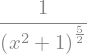

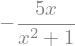

In [3]:
g = (x**2 + 1)**(-S(5)/2)
display(g)
simplify(diff(g, x) / g)

V = 


'h, r, s, t'

m = 1 
delta = 5
Case 3) e = 5 
delta = 5, degree(t, x) - m = 1


Linear system


Solution


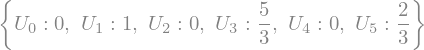

so U =


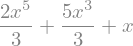

In [5]:
u, v = hyperexponential_integration(-5*x, x**2 + 1, show_info=True)

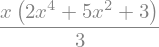

In [6]:
display(u, v)

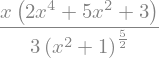

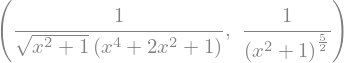

In [9]:
f = u/v * g
display(f)
simplify(expand(diff(f, x))), g

Note: These are the same but Sympy cannot simplify it for some reason. 